# Mutual Information Classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the titanic dataset

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
s = df.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Seperate X and Y

In [6]:
X = df.drop(labels=['PassengerId','Name','Survived'],axis=1)
Y = df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


### Cat Con seperation

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Sex', 'Ticket', 'Cabin', 'Embarked']

In [10]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [11]:
cat1 = ['Cabin']
cat2 = ['Sex','Ticket','Embarked']

### Pipeline for feature selection

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('Ordinal',OrdinalEncoder())])

cat_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                            ('Ordinal',OrdinalEncoder())])

pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat1',cat_pipe1,cat1),
                         ('cat2',cat_pipe2,cat2)])

In [14]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 8.27377244e-01, -5.65736461e-01,  4.32793366e-01, ...,
         1.00000000e+00,  5.23000000e+02,  2.00000000e+00],
       [-1.56610693e+00,  6.63861032e-01,  4.32793366e-01, ...,
         0.00000000e+00,  5.96000000e+02,  0.00000000e+00],
       [ 8.27377244e-01, -2.58337088e-01, -4.74545196e-01, ...,
         0.00000000e+00,  6.69000000e+02,  2.00000000e+00],
       ...,
       [ 8.27377244e-01, -1.04637401e-01,  4.32793366e-01, ...,
         0.00000000e+00,  6.75000000e+02,  2.00000000e+00],
       [-1.56610693e+00, -2.58337088e-01, -4.74545196e-01, ...,
         1.00000000e+00,  8.00000000e+00,  0.00000000e+00],
       [ 8.27377244e-01,  2.02761972e-01, -4.74545196e-01, ...,
         1.00000000e+00,  4.66000000e+02,  1.00000000e+00]])

In [15]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Cabin', 'cat2__Sex', 'cat2__Ticket', 'cat2__Embarked'],
      dtype=object)

In [16]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Cabin,cat2__Sex,cat2__Ticket,cat2__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,147.0,1.0,523.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,81.0,0.0,596.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,147.0,0.0,669.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,55.0,0.0,49.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,147.0,1.0,472.0,2.0


### Calculate Mutual information Scores

In [17]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre,Y)
mi

array([0.04776232, 0.03697043, 0.01181267, 0.01246082, 0.13876722,
       0.05708778, 0.16719089, 0.1231295 , 0.02327743])

In [18]:
mi = pd.Series(mi)
mi.index=X_pre.columns
mi = mi.sort_values(ascending=False)
mi

cat2__Sex         0.167191
num__Fare         0.138767
cat2__Ticket      0.123130
cat1__Cabin       0.057088
num__Pclass       0.047762
num__Age          0.036970
cat2__Embarked    0.023277
num__Parch        0.012461
num__SibSp        0.011813
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

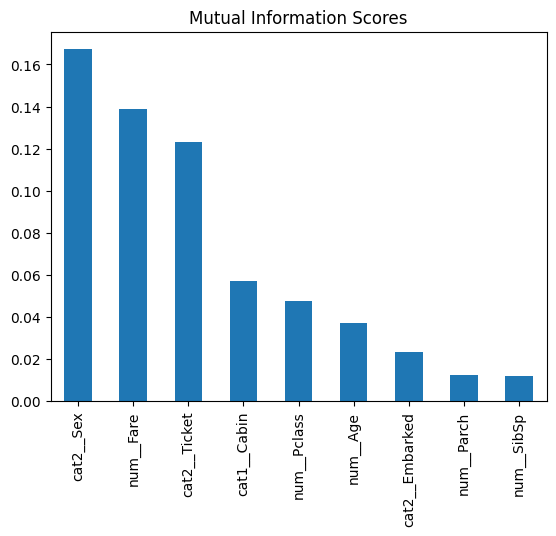

In [19]:
mi.plot(kind='bar',title='Mutual Information Scores')

In [20]:
sel_cols = list(mi[0:5].index)
sel_cols

['cat2__Sex', 'num__Fare', 'cat2__Ticket', 'cat1__Cabin', 'num__Pclass']

### Select K Best

In [21]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
sel = SelectKBest(mutual_info_classif,k=5)
sel_values = sel.fit_transform(X_pre,Y)
sel_cols1 = sel.get_feature_names_out()
sel_cols1

array(['num__Pclass', 'num__Fare', 'cat1__Cabin', 'cat2__Sex',
       'cat2__Ticket'], dtype=object)

In [22]:
sel_cols[0]

'cat2__Sex'

In [23]:
sel_cols[0].split('__')[1]

'Sex'

In [24]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [25]:
imp_cols

['Sex', 'Fare', 'Ticket', 'Cabin', 'Pclass']

In [26]:
X_sel = X[imp_cols]
X_sel.head()

,Sex,Fare,Ticket,Cabin,Pclass
0,male,7.2500,A/5 21171,NaN,3
1,female,71.2833,PC 17599,C85,1
2,female,7.9250,STON/O2. 3101282,NaN,3
3,female,53.1000,113803,C123,1
4,male,8.0500,373450,NaN,3


### Cat Con Sep Selected cols

In [27]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [28]:
cat_sel

['Sex', 'Ticket', 'Cabin']

In [29]:
con_sel

['Fare', 'Pclass']

In [30]:
cat_sel1 = ['Cabin']
cat_sel2 = ['Sex','Ticket']

### Create Preprocessing Pipeline for final model

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
num_pipe_sel = Pipeline([('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())])

cat_pipe_sel1 = Pipeline([('impute',SimpleImputer(strategy='constant',fill_value='unknown')),
                          ('Ohe',OneHotEncoder(handle_unknown='ignore'))])

cat_pipe_sel2 = Pipeline([('imupte',SimpleImputer(strategy='most_frequent')),
                          ('ohe',OneHotEncoder(handle_unknown='ignore'))])

sel_pre = ColumnTransformer([('num',num_pipe_sel,con_sel),
                             ('cat1',cat_pipe_sel1,cat_sel1),
                             ('cat2',cat_pipe_sel2,cat_sel2)])

In [33]:
X_sel_pre = sel_pre.fit_transform(X_sel).toarray()
X_sel_pre

array([[-0.50244517,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78684529, -1.56610693,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.48885426,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.17626324,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04438104, -1.56610693,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.49237783,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [34]:
cols_sel = sel_pre.get_feature_names_out()
cols_sel

array(['num__Fare', 'num__Pclass', 'cat1__Cabin_A10', 'cat1__Cabin_A14',
       'cat1__Cabin_A16', 'cat1__Cabin_A19', 'cat1__Cabin_A20',
       'cat1__Cabin_A23', 'cat1__Cabin_A24', 'cat1__Cabin_A26',
       'cat1__Cabin_A31', 'cat1__Cabin_A32', 'cat1__Cabin_A34',
       'cat1__Cabin_A36', 'cat1__Cabin_A5', 'cat1__Cabin_A6',
       'cat1__Cabin_A7', 'cat1__Cabin_B101', 'cat1__Cabin_B102',
       'cat1__Cabin_B18', 'cat1__Cabin_B19', 'cat1__Cabin_B20',
       'cat1__Cabin_B22', 'cat1__Cabin_B28', 'cat1__Cabin_B3',
       'cat1__Cabin_B30', 'cat1__Cabin_B35', 'cat1__Cabin_B37',
       'cat1__Cabin_B38', 'cat1__Cabin_B39', 'cat1__Cabin_B4',
       'cat1__Cabin_B41', 'cat1__Cabin_B42', 'cat1__Cabin_B49',
       'cat1__Cabin_B5', 'cat1__Cabin_B50', 'cat1__Cabin_B51 B53 B55',
       'cat1__Cabin_B57 B59 B63 B66', 'cat1__Cabin_B58 B60',
       'cat1__Cabin_B69', 'cat1__Cabin_B71', 'cat1__Cabin_B73',
       'cat1__Cabin_B77', 'cat1__Cabin_B78', 'cat1__Cabin_B79',
       'cat1__Cabin_B80', 'cat

In [35]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=cols_sel)
X_sel_pre.head()

,num__Fare,num__Pclass,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,cat1__Cabin_A23,cat1__Cabin_A24,cat1__Cabin_A26,...,cat2__Ticket_STON/O2. 3101290,cat2__Ticket_SW/PP 751,cat2__Ticket_W./C. 14258,cat2__Ticket_W./C. 14263,cat2__Ticket_W./C. 6607,cat2__Ticket_W./C. 6608,cat2__Ticket_W./C. 6609,cat2__Ticket_W.E.P. 5734,cat2__Ticket_W/C 14208,cat2__Ticket_WE/P 5735
0,-0.502445,0.827377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.786845,-1.566107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.488854,0.827377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.420730,-1.566107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.486337,0.827377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Apply train test split

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre,Y,test_size=0.2,random_state=42)

In [37]:
xtrain.shape

(712, 833)

In [38]:
xtest.shape

(179, 833)

### Create a model of GBC

In [39]:
params = {'n_estimators':[50,100,200,300],
          'learning_rate':[0.01,0.05,0.1],
          'max_depth':[3,4,5,6,7,8,9,10]}

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc,param_distributions=params,cv=5,scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='f1')

In [41]:
rscv.best_params_

{'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}

In [42]:
rscv.best_score_

0.7370315012529776

In [43]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(max_depth=10, n_estimators=200)

In [44]:
# Training accuracy
best_gbc.score(xtrain,ytrain)

0.9873595505617978

In [45]:
# Testing accuracy
best_gbc.score(xtest,ytest)

0.8212290502793296

### Predict Values for training and testing

In [46]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [47]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [48]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [49]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [50]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


### Plot the confusion matrix for testing

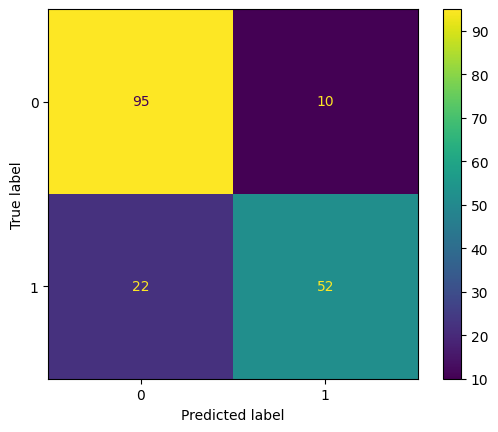

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_gbc.classes_)
cfd.plot()

### Classification Report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



### Predicting the new data

In [53]:
df2 = pd.read_csv('test_titanic.csv')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
xnew = sel_pre.transform(df2).toarray()
xnew

array([[-0.49078316,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.50747884,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.45336687, -0.36936484,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.50244517,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.48633742,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.19824428,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [55]:
xnew = pd.DataFrame(xnew,columns=cols_sel)
xnew.head()

,num__Fare,num__Pclass,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,cat1__Cabin_A23,cat1__Cabin_A24,cat1__Cabin_A26,...,cat2__Ticket_STON/O2. 3101290,cat2__Ticket_SW/PP 751,cat2__Ticket_W./C. 14258,cat2__Ticket_W./C. 14263,cat2__Ticket_W./C. 6607,cat2__Ticket_W./C. 6608,cat2__Ticket_W./C. 6609,cat2__Ticket_W.E.P. 5734,cat2__Ticket_W/C 14208,cat2__Ticket_WE/P 5735
0,-0.490783,0.827377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.507479,0.827377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.453367,-0.369365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.474005,0.827377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.401017,0.827377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
preds = best_gbc.predict(xnew)
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [57]:
probs = best_gbc.predict_proba(xnew)
probs

array([[0.97361772, 0.02638228],
       [0.07041283, 0.92958717],
       [0.97371365, 0.02628635],
       [0.97371365, 0.02628635],
       [0.13801422, 0.86198578],
       [0.97371365, 0.02628635],
       [0.06386571, 0.93613429],
       [0.96425401, 0.03574599],
       [0.06386571, 0.93613429],
       [0.96425401, 0.03574599],
       [0.97361772, 0.02638228],
       [0.96425401, 0.03574599],
       [0.01655432, 0.98344568],
       [0.96425401, 0.03574599],
       [0.01655432, 0.98344568],
       [0.02064851, 0.97935149],
       [0.96994653, 0.03005347],
       [0.97361772, 0.02638228],
       [0.1579426 , 0.8420574 ],
       [0.06386571, 0.93613429],
       [0.95854104, 0.04145896],
       [0.97617572, 0.02382428],
       [0.02064851, 0.97935149],
       [0.95854104, 0.04145896],
       [0.01577064, 0.98422936],
       [0.98106234, 0.01893766],
       [0.01655432, 0.98344568],
       [0.97361772, 0.02638228],
       [0.83694747, 0.16305253],
       [0.96425401, 0.03574599],
       [0.

In [58]:
probs1 = probs[:,-1]
probs1

array([0.02638228, 0.92958717, 0.02628635, 0.02628635, 0.86198578,
       0.02628635, 0.93613429, 0.03574599, 0.93613429, 0.03574599,
       0.02638228, 0.03574599, 0.98344568, 0.03574599, 0.98344568,
       0.97935149, 0.03005347, 0.02638228, 0.8420574 , 0.93613429,
       0.04145896, 0.02382428, 0.97935149, 0.04145896, 0.98422936,
       0.01893766, 0.98344568, 0.02638228, 0.16305253, 0.03574599,
       0.03574599, 0.03826813, 0.99092874, 0.05893718, 0.11949647,
       0.02638228, 0.08629257, 0.08629257, 0.02628635, 0.60812118,
       0.03005347, 0.1114968 , 0.02638228, 0.97870085, 0.98344568,
       0.02920244, 0.1114968 , 0.02638228, 0.98344568, 0.99266817,
       0.11949647, 0.03005347, 0.97935149, 0.98422936, 0.03099109,
       0.03574599, 0.02638228, 0.02978847, 0.03574599, 0.98422936,
       0.02638228, 0.03005347, 0.02638228, 0.93613429, 0.08805797,
       0.97935149, 0.86964231, 0.03826813, 0.1114968 , 0.98422936,
       0.88119877, 0.02638228, 0.8420574 , 0.1114968 , 0.98422

In [59]:
final_df = df2[['PassengerId']]
final_df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [60]:
final_df['Survived_pred']=preds
final_df['Survived_prob']=probs1

In [61]:
final_df

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.026382
1,893,1,0.929587
2,894,0,0.026286
3,895,0,0.026286
4,896,1,0.861986
...,...,...,...
413,1305,0,0.026286
414,1306,1,0.984229
415,1307,0,0.026382
416,1308,0,0.026286


In [62]:
final_df['Survived_pred'].value_counts()

Survived_pred
0    282
1    136
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

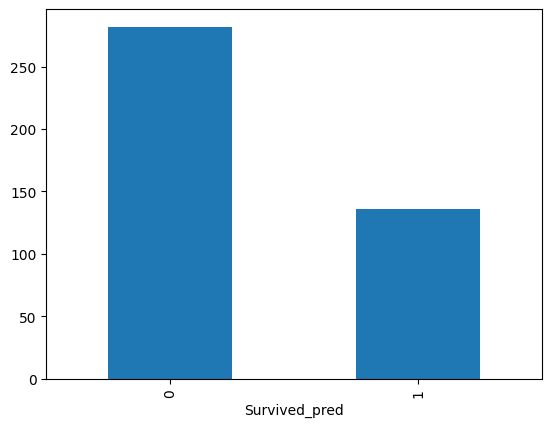

In [63]:
final_df['Survived_pred'].value_counts().plot(kind='bar')

### Saving final df to other csv file

In [64]:
final_df.to_csv('Predictions.csv',index=False)

### Feature importances 

In [65]:
imp = best_gbc.feature_importances_
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending=False)
imp

cat2__Sex_male             1.872855e-01
cat2__Sex_female           1.192762e-01
num__Fare                  9.928625e-02
num__Pclass                8.869339e-02
cat1__Cabin_unknown        3.162363e-02
                               ...     
cat2__Ticket_250651        0.000000e+00
cat2__Ticket_250652        0.000000e+00
cat2__Ticket_WE/P 5735     0.000000e+00
cat2__Ticket_C.A. 33595   -8.057429e-19
cat2__Ticket_113783       -1.344971e-17
Length: 833, dtype: float64

<Axes: >

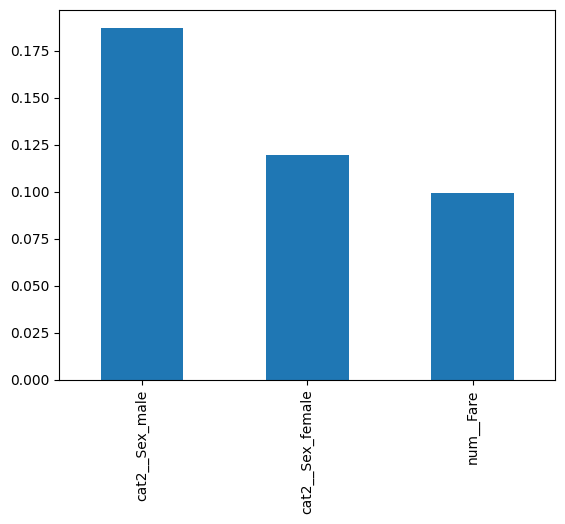

In [66]:
imp[0:3].plot(kind='bar')

### ROC AUC 

In [67]:
yprob_tr = best_gbc.predict_proba(xtrain)[:,-1]
yprob_ts = best_gbc.predict_proba(xtest)[:,-1]

In [68]:
from sklearn.metrics import roc_auc_score
tr_auc = roc_auc_score(ytrain,yprob_tr)
ts_auc = roc_auc_score(ytest,yprob_ts)

In [69]:
tr_auc

0.9996134193895387

In [70]:
ts_auc

0.8794079794079794

In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_gbc,xtrain,ytrain,cv=5,scoring='roc_auc')
scores

array([0.85861423, 0.85351644, 0.83644265, 0.84799661, 0.90130471])

In [72]:
scores.mean()

0.8595749292087007

### Plotting ROC AUC Curve

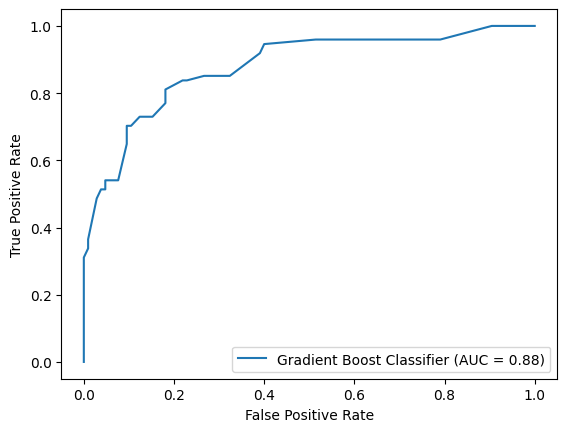

In [74]:
from sklearn.metrics import roc_curve, RocCurveDisplay
fpr, tpr, thr = roc_curve(ytest,yprob_ts)
roc = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=ts_auc,estimator_name='Gradient Boost Classifier')
roc.plot()

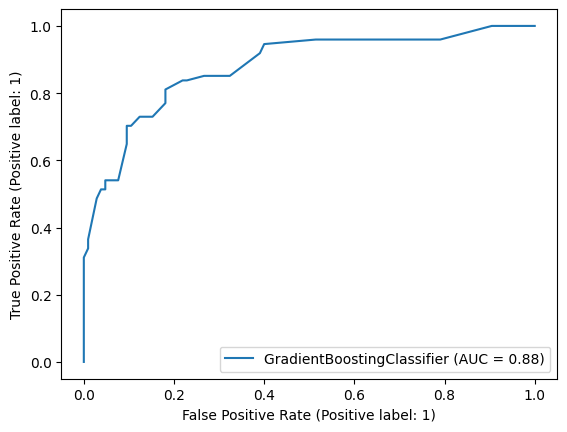

In [75]:
RocCurveDisplay.from_estimator(best_gbc,xtest,ytest)